# Staff-Graded SVD and PCA

### Part (a)

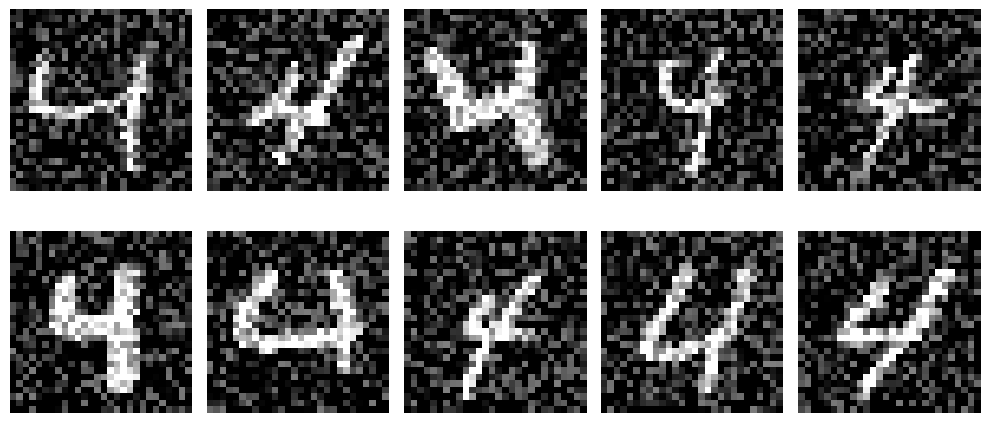

In [8]:
import mnist
import numpy as np
import matplotlib.pyplot as plt


# Get data
data_unfurled = np.genfromtxt('MNIST_Subset.csv', delimiter=',')
data_unfurled = data_unfurled[1:data_unfurled.shape[0],:] # Drop first row
data = np.reshape(data_unfurled, (data_unfurled.shape[0],28,-1)) # Reshape to be compatible with plotting

# Plot the first 10 images
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(data[i], cmap='gray')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

These images are of the digit 4. They are moderately noisy.

### Part (b)

Reconstructed Images:


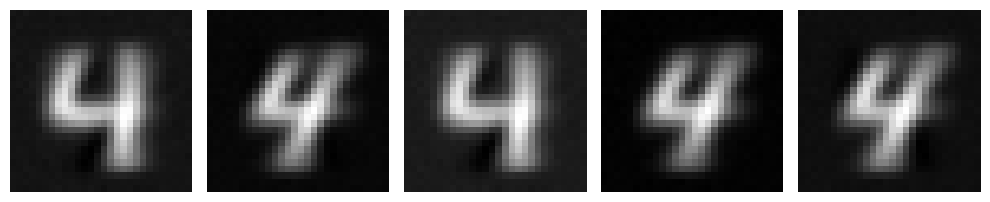

Original Images:


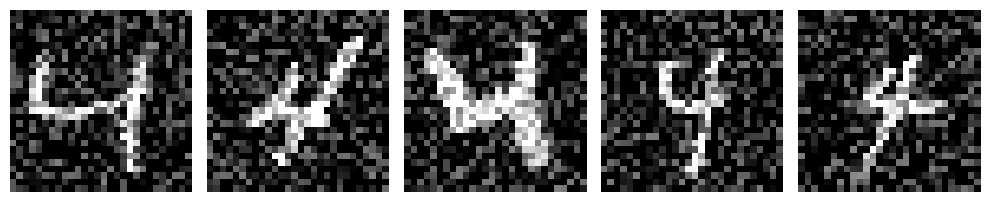

In [9]:

def SVD_reconstruct(k = 2):
    # Perform SVD
    u, s, vt = np.linalg.svd(data_unfurled)

    # Reconstruct
    data_reconst = u[:,0:k] @ np.diag(s[0:k]) @ vt[0:k,:]
    data_reconst = np.reshape(data_reconst, (data_reconst.shape[0],28,-1))


    # Plot reconstructed
    fig, axs = plt.subplots(1, 5, figsize=(10, 5))
    axs = axs.flatten()

    for i in range(5):
        axs[i].imshow(data_reconst[i], cmap='gray')
        axs[i].axis('off')

    plt.tight_layout()
    print('Reconstructed Images:')
    plt.show()


    # Plot the original images
    fig, axs = plt.subplots(1, 5, figsize=(10, 5))
    axs = axs.flatten()

    for i in range(5):
        axs[i].imshow(data[i], cmap='gray')
        axs[i].axis('off')

    plt.tight_layout()
    print('Original Images:')
    plt.show()

SVD_reconstruct()

The shapes of the denoised images are very similar to their noisy counterparts.

The edges of the denoised images are fuzzier and more anti-aliased than the originals.

### Part (c)

Reconstructed Images:


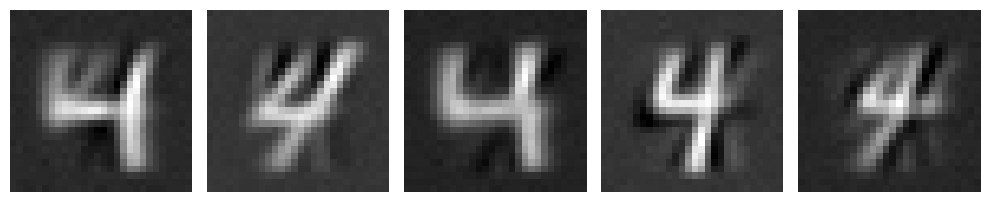

Original Images:


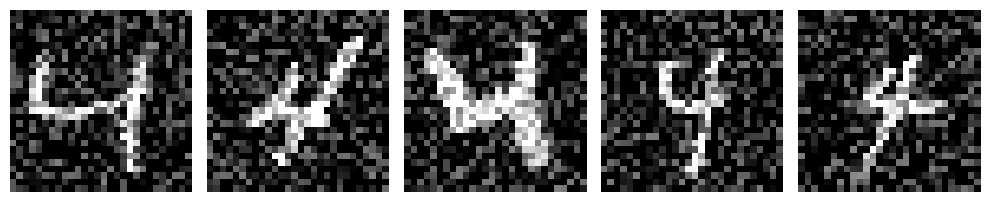

In [10]:
SVD_reconstruct(15)

The shapes of the denoised images seem to be be hazy in comparison to the originals. Around the edges of the digits, there appear to be apparitions of other instances of handrwitten fours, as if several fours were written on a blackboard and erased in succession.

Compared to k = 2, these k = 15 digits appear less clear, as the black space surrounding each reconstructed digit is tinted more gray, making the digit less bold.

### Part (d)

Reconstructed Images:


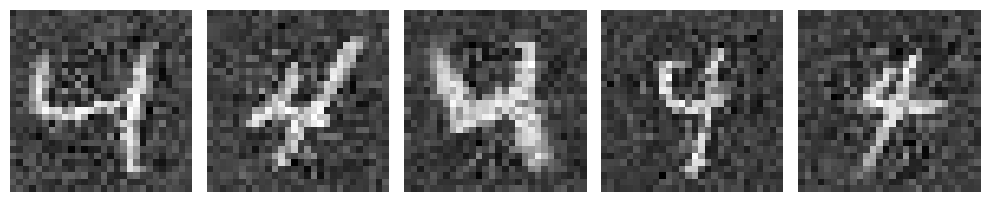

Original Images:


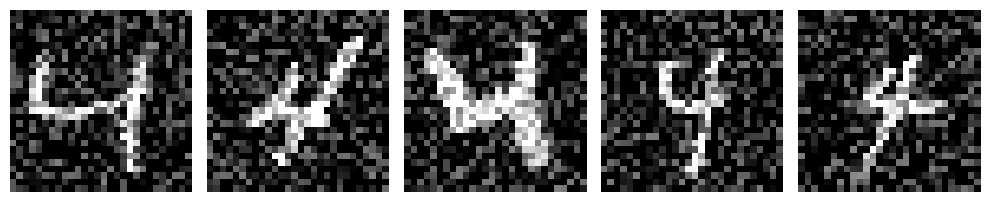

In [11]:
SVD_reconstruct(250)

The denoised images now appear very similar to the original noisy images, as much of the visual noise has been preserved due to the high singular value count. The edges of the denoised digits are a bit fuzzier than the originals in some places, with the black space surrounding the digits now smudged into a general shade of gray.

These k = 250 denoised images resemble the original noisy images far more than either the k = 4 or the k = 15 versions, visual noise and all. In these k = 250 images, comparatively little noise reduction has been achieved from the originals.